In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
from tensorflow.keras.models import Sequential
from glob import glob

In [4]:
train_set = "M:\\python\\AgroVision\\dataset\\Cotton Disease\\train\\"
test_set = "M:\\python\\AgroVision\\dataset\\Cotton Disease\\test\\"

In [6]:
IMAGE_SIZE = [224,224]
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [7]:
for layer in inception.layers:
    layer.trainable = False


In [8]:
folders = glob("M:\\python\\AgroVision\\dataset\\Cotton Disease\\train\\*") # len(folders) = 4
folders

['M:\\python\\AgroVision\\dataset\\Cotton Disease\\train\\diseased cotton leaf',
 'M:\\python\\AgroVision\\dataset\\Cotton Disease\\train\\diseased cotton plant',
 'M:\\python\\AgroVision\\dataset\\Cotton Disease\\train\\fresh cotton leaf',
 'M:\\python\\AgroVision\\dataset\\Cotton Disease\\train\\fresh cotton plant']

In [9]:
x = Flatten()(inception.output)
prediction = Dense(len(folders),activation='softmax')(x)

In [10]:
model1 = Model(inputs=inception.input, outputs=prediction)
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
______________________________________________________________________________________________

In [11]:
model1.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('M:\\python\\AgroVision\\dataset\\Cotton Disease\\train\\',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('M:\\python\\AgroVision\\dataset\\Cotton Disease\\test\\',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [14]:
incep1 = model1.fit_generator(training_set,
                            validation_data = test_set,
                            epochs = 7,
                            steps_per_epoch = len(training_set),
                            validation_steps=len(test_set))


C:\Users\Admin\Anaconda3\envs\py\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/7
61/61 [==============================] - 209s 3s/step - loss: 2.2907 - accuracy: 0.7447 - val_loss: 0.8259 - val_accuracy: 0.8113
Epoch 2/7
61/61 [==============================] - 206s 3s/step - loss: 0.6965 - accuracy: 0.8908 - val_loss: 0.6073 - val_accuracy: 0.8679
Epoch 3/7
61/61 [==============================] - 198s 3s/step - loss: 0.6003 - accuracy: 0.9031 - val_loss: 0.3344 - val_accuracy: 0.9151
Epoch 4/7
61/61 [==============================] - 192s 3s/step - loss: 0.5462 - accuracy: 0.9124 - val_loss: 0.6715 - val_accuracy: 0.8962
Epoch 5/7
61/61 [==============================] - 200s 3s/step - loss: 0.6815 - accuracy: 0.9098 - val_loss: 0.5100 - val_accuracy: 0.9340
Epoch 6/7
61/61 [==============================] - 212s 3s/step - loss: 0.5274 - accuracy: 0.9277 - val_loss: 0.4679 - val_accuracy: 0.9151
Epoch 7/7
61/61 [==============================] - 215s 4s/step - loss: 0.5533 - accuracy: 0.9221 - val_loss: 0.3903 - val_accuracy: 0.9434


In [15]:
acc = incep1.history['accuracy']
val_acc = incep1.history['val_accuracy']
loss = incep1.history['loss']
val_loss = incep1.history['val_loss']
epochs=range(len(acc))

Text(0.5, 1.0, 'Training and Validation Accuracy')

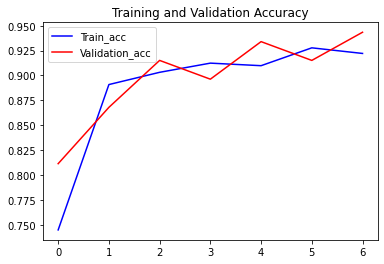

In [16]:
plt.plot(epochs,acc,label='Train_acc',color='blue')
plt.plot(epochs,val_acc,label='Validation_acc',color='red')
plt.legend()
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation loss')

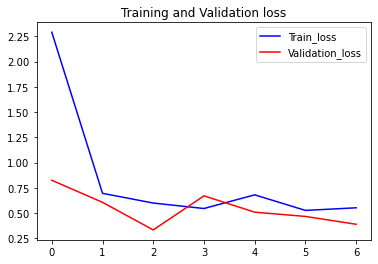

In [17]:
plt.plot(epochs,loss,label='Train_loss',color='blue')
plt.plot(epochs,val_loss,label='Validation_loss',color='red')
plt.legend()
plt.title("Training and Validation loss")

In [18]:
class_dict = {0:'fusarium wilt ',
              1:'Curl Leaf Disease',
              2:'Healthy cotton leaf',
              3:'Healthy cotton plant' }

In [19]:
import cv2
img_path =  'M:\\python\\AgroVision\\dataset\\Cotton Disease\\test\\diseased cotton leaf\\dis_leaf (153)_iaip.jpg'
img = image.load_img(img_path, target_size=(224, 224))
 # Preprocessing the image
x = image.img_to_array(img)
# x = np.true_divide(x, 255)
## Scaling
x=x/255
x = np.expand_dims(x, axis=0)
preds = model1.predict(x)
preds=np.argmax(preds, axis=1)
pred_class = class_dict[preds[0]]

print(pred_class)


fusarium wilt 


In [20]:
y_pred = model1.predict(test_set)

In [24]:
y_pred

array([[9.99990702e-01, 1.87653820e-12, 2.57263082e-08, 9.27697329e-06],
       [7.79804488e-09, 5.82020387e-09, 5.84572663e-05, 9.99941587e-01],
       [6.33585892e-12, 7.16476670e-11, 1.09617081e-16, 1.00000000e+00],
       [3.32087247e-10, 9.96395051e-01, 2.25603917e-16, 3.60490265e-03],
       [1.74795045e-03, 5.12473285e-04, 4.65915471e-01, 5.31824052e-01],
       [5.99496379e-05, 5.70240417e-11, 6.95419902e-11, 9.99940038e-01],
       [1.47233173e-01, 1.12954970e-08, 5.97702619e-03, 8.46789777e-01],
       [2.36270783e-18, 8.27060771e-17, 6.06749883e-18, 1.00000000e+00],
       [1.00000000e+00, 5.21915550e-16, 5.08812059e-09, 1.34657807e-09],
       [6.72663823e-02, 6.42195542e-12, 1.00239806e-01, 8.32493782e-01],
       [7.55539430e-14, 9.99994874e-01, 5.37638599e-16, 5.12939278e-06],
       [6.26186933e-03, 3.23542348e-09, 2.42113471e-01, 7.51624703e-01],
       [9.99999523e-01, 6.40846123e-16, 4.06237891e-12, 5.12599115e-07],
       [9.99993086e-01, 3.73744614e-14, 3.08418929e

In [25]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [26]:
IMAGE_SIZE = [224, 224]

train_path = 'M:\\python\\AgroVision\\dataset\\Cotton Disease\\train\\'   #Path of train dataset
valid_path = 'M:\\python\\AgroVision\\dataset\\Cotton Disease\\test\\'

In [27]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 17s 0us/step


In [28]:
for layer in resnet.layers:
    layer.trainable = False

In [29]:
folders = glob("M:\\python\\AgroVision\\dataset\\Cotton Disease\\train\\*")
folders

['M:\\python\\AgroVision\\dataset\\Cotton Disease\\train\\diseased cotton leaf',
 'M:\\python\\AgroVision\\dataset\\Cotton Disease\\train\\diseased cotton plant',
 'M:\\python\\AgroVision\\dataset\\Cotton Disease\\train\\fresh cotton leaf',
 'M:\\python\\AgroVision\\dataset\\Cotton Disease\\train\\fresh cotton plant']

In [30]:
x = Flatten()(resnet.output)

In [31]:
len(folders)

4

In [32]:
prediction = Dense(len(folders), activation='softmax')(x)

#Creating a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [33]:
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])





#Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Train data
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

#Test data
test_datagen = ImageDataGenerator(rescale = 1./255)




#Make sure you provide the same target size as initialied for the image size
#Reading the number of images in train dataset
training_set = train_datagen.flow_from_directory('M:\\python\\AgroVision\\dataset\\Cotton Disease\\train\\',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')




#Reading the number of images in test dataset
test_set = test_datagen.flow_from_directory('M:\\python\\AgroVision\\dataset\\Cotton Disease\\test\\',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')





#Fit the model
r = model.fit(training_set, validation_data=test_set, epochs=20, steps_per_epoch=len(training_set), validation_steps=len(test_set))



Found 1951 images belonging to 4 classes.
Found 106 images belonging to 4 classes.
Epoch 1/20
36/61 [================>.............] - ETA: 1:56 - loss: 2.7841 - accuracy: 0.3620